In [1]:
import collections
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import scipy.stats as stats 

from scipy.optimize import leastsq

%matplotlib inline

## Load a sample Erdos-Renyi graph

In [2]:
# Erdos-Renyi graph
G = nx.gnp_random_graph(400, 0.02)

# Degree sequence
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence

# Histogram vector
degreeCount = collections.Counter(degree_sequence)
degs, cnt = zip(*degreeCount.items())
hist = cnt / np.sum(cnt)
degreeCount

Counter({20: 1,
         18: 1,
         17: 1,
         15: 2,
         14: 8,
         13: 13,
         12: 19,
         11: 30,
         10: 44,
         9: 53,
         8: 52,
         7: 51,
         6: 53,
         5: 42,
         4: 21,
         3: 2,
         2: 7})

## Make a simple least-squares fit to the histogram

In [3]:
# We use a gamma pdf as the fit function due to its generality
fitfunc = lambda p, x: stats.gamma.pdf(x, p[0], p[1], p[2])
errfunc  = lambda p, x, y: np.abs(y - fitfunc(p, x))

# Initialization of the parameters
init = [2.0, 0.0, 1.0]

out   = leastsq( errfunc, init, args=(degs, hist))
c = out[0]

curve = fitfunc(c, degs)

C:\Users\Hugo\Anaconda3\envs\ntds_2018\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


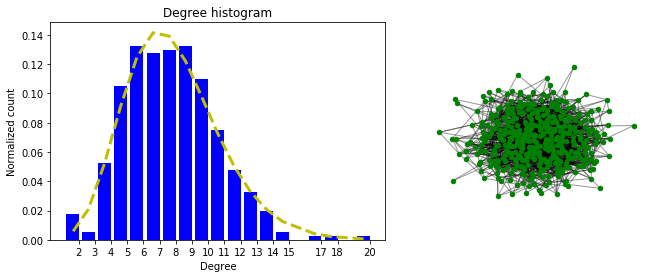

In [4]:
fig, ax = plt.subplots()
plt.bar(degs, hist, width=0.80, color='b')

plt.title("Degree histogram")
plt.ylabel("Normalized count")
plt.xlabel("Degree")
ax.set_xticks([d + 0.4 for d in degs])
ax.set_xticklabels(degs)

# overlay curve fit
plt.plot(degs, curve, '--y', linewidth=3)

# draw graph in inset
plt.axes([1.0, 0.25, 0.5, 0.5])
Gcc = sorted(nx.connected_component_subgraphs(G), key=len, reverse=True)[0]
pos = nx.spring_layout(G)
plt.axis('off')
nx.draw_networkx_nodes(G, pos, node_size=20, node_color='g')
nx.draw_networkx_edges(G, pos, alpha=0.4)

plt.show()

In [5]:
nzeros = np.sum(curve == 0)
print("Number of zeros on the curve evaluation points = {}".format(nzeros))

Number of zeros on the curve evaluation points = 0


In [6]:
sum(cur)

array([0.00127709, 0.00624948, 0.01265791, 0.02397083, 0.04211801,
       0.06804071, 0.09997082, 0.13185362, 0.15362773, 0.15501635,
       0.13210863, 0.09207198, 0.05029516, 0.02033068, 0.00561031,
       0.00093917])